In [1]:
%load_ext autoreload
%autoreload 2

pattern = "pattern-2"

entrypoint = pattern
app_cwl_file = f'../cwl-workflow/{pattern}.cwl'

try: 
    from docs.helpers import plot_cwl, wrap_cwl
except (ImportError, ModuleNotFoundError) as e:

    import os
    import sys
    module_path = os.path.abspath(os.path.join('.')) # or the path to your source code
    sys.path.insert(0, module_path)

from helpers import WorkflowViewer, WorkflowWrapper
from cwl_loader import dump_cwl
from pathlib import Path

In [2]:
wf = WorkflowViewer.from_file(app_cwl_file, entrypoint)

2025-08-14 20:08:01.950 | INFO     | cwl_loader:load_cwl_from_location:186 - Loading CWL document from ../cwl-workflow/pattern-2.cwl...
2025-08-14 20:08:01.958 | INFO     | cwl_loader:load_cwl_from_yaml:117 - Updating the model to v1.2...
2025-08-14 20:08:01.962 | INFO     | cwl_loader:load_cwl_from_yaml:128 - Raw CWL document successfully updated to v1.2! Now converting to the CWL model...
2025-08-14 20:08:01.967 | INFO     | cwl_loader:load_cwl_from_yaml:136 - Raw CWL document successfully updated to v1.2! Now dereferencing the FQNs...
2025-08-14 20:08:01.968 | INFO     | cwl_loader:_clean_process:62 -   Cleaning Workflow pattern-2...
2025-08-14 20:08:01.968 | INFO     | cwl_loader:_clean_process:62 -   Cleaning CommandLineTool clt...
2025-08-14 20:08:01.968 | INFO     | cwl_loader:load_cwl_from_yaml:144 - CWL document successfully dereferenced!


## Application Package Pattern 2

The CWL includes: 

- two input parameters of type `Directory`
- one output parameter of type `Directory`

This scenario typically takes as input one pre-event acquisition, one post-even acquisition, applies an algorithm and produces a result

Implementation: delineate water bodies using NDWI and Otsu automatic threshold taking as input two Landsat-8/9 acquisitions

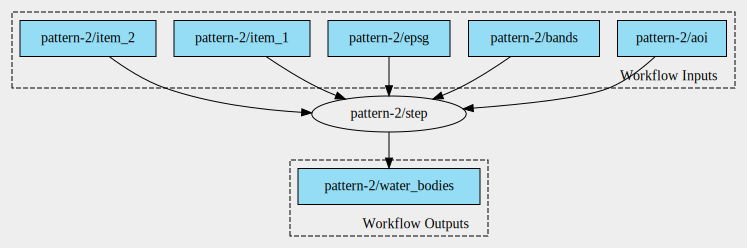

In [3]:
wf.plot()

### Inputs

In [4]:
wf.display_inputs()

| Id | Type | Label | Doc |
| --- | --- | --- | --- |
| `aoi` | `string` | area of interest | area of interest as a bounding box |
| `epsg` | `string` | EPSG code | EPSG code |
| `bands` | `string[]` | bands used for the NDWI | bands used for the NDWI |
| `item_1` | `Directory` | Landsat-8/9 acquisition reference | Landsat-8/9 acquisition reference |
| `item_2` | `Directory` | Landsat-8/9 acquisition reference | Landsat-8/9 acquisition reference |


### Steps

In [5]:
wf.display_steps()

| Id | Runs | Label | Doc |
| --- | --- | --- | --- |
| `step` | `#clt` | None | None |


### Outputs

In [6]:
wf.display_outputs()

| Id | Type | Label | Doc |
| --- | --- | --- | --- |
| `water_bodies` | `Directory` | Water bodies detected | Water bodies detected based on the NDWI and otsu threshold |


## Data flow management

In [7]:
w = WorkflowWrapper(workflow=wf.workflow, entrypoint=entrypoint)
wrapped = w.wrap()

app_cwl_file = f'.{entrypoint}.cwl'

with open(app_cwl_file, 'w') as f:
    dump_cwl(process=wrapped, stream=f)

2025-08-14 20:08:02.390 | INFO     | cwl_loader:load_cwl_from_location:186 - Loading CWL document from https://raw.githubusercontent.com/eoap/application-package-patterns/refs/heads/main/templates/stage-in.cwl...
2025-08-14 20:08:02.937 | INFO     | cwl_loader:load_cwl_from_yaml:117 - Updating the model to v1.2...
2025-08-14 20:08:02.938 | INFO     | cwl_loader:load_cwl_from_yaml:128 - Raw CWL document successfully updated to v1.2! Now converting to the CWL model...
2025-08-14 20:08:05.634 | INFO     | cwl_loader:load_cwl_from_yaml:136 - Raw CWL document successfully updated to v1.2! Now dereferencing the FQNs...
2025-08-14 20:08:05.634 | INFO     | cwl_loader:_clean_process:62 -   Cleaning CommandLineTool my-asthonishing-stage-in-directory...
2025-08-14 20:08:05.635 | INFO     | cwl_loader:load_cwl_from_yaml:144 - CWL document successfully dereferenced!
2025-08-14 20:08:05.635 | INFO     | cwl_loader:load_cwl_from_location:186 - Loading CWL document from https://raw.githubusercontent.

In [8]:
wf = WorkflowViewer(cwl_file=app_cwl_file, workflow=wrapped, entrypoint="main")

wf.plot()

### Workflow components diagram

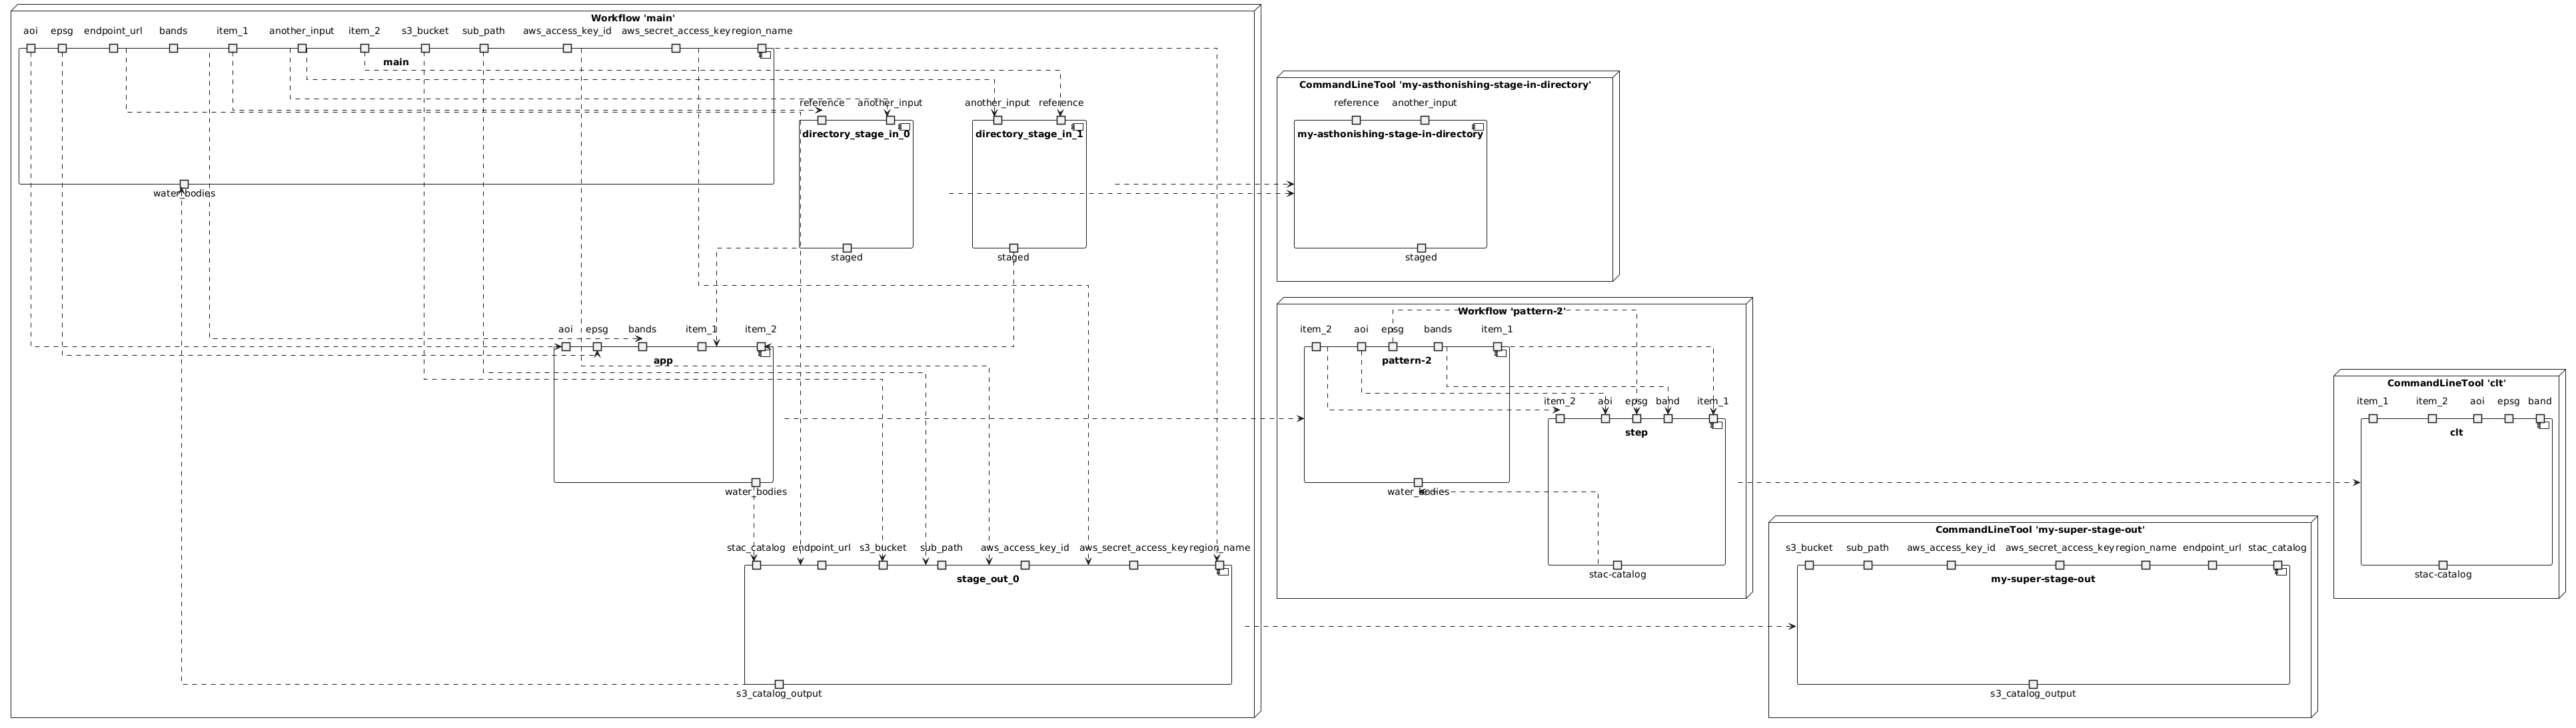

In [9]:
wf.display_components_diagram()

### Inputs

In [10]:
wf.display_inputs()

| Id | Type | Label | Doc |
| --- | --- | --- | --- |
| `aoi` | `string` | area of interest - pattern-2/aoi | area of interest as a bounding box - This parameter is derived from pattern-2/aoi |
| `epsg` | `string` | EPSG code - pattern-2/epsg | EPSG code - This parameter is derived from pattern-2/epsg |
| `bands` | `string[]` | bands used for the NDWI - pattern-2/bands | bands used for the NDWI - This parameter is derived from pattern-2/bands |
| `another_input` | `string` | Another Input - my-asthonishing-stage-in-directory/another_input | An additional input for demonstration purposes - This parameter is derived from my-asthonishing-stage-in-directory/another_input |
| `item_1` | `https://raw.githubusercontent.com/eoap/schemas/main/string_format.yaml#URI` | Landsat-8/9 acquisition reference - pattern-2/item_1 | Landsat-8/9 acquisition reference - This parameter is derived from pattern-2/item_1 |
| `item_2` | `https://raw.githubusercontent.com/eoap/schemas/main/string_format.yaml#URI` | Landsat-8/9 acquisition reference - pattern-2/item_2 | Landsat-8/9 acquisition reference - This parameter is derived from pattern-2/item_2 |
| `s3_bucket` | `string` | my-super-stage-out/s3_bucket | This parameter is derived from: my-super-stage-out/s3_bucket |
| `sub_path` | `string` | my-super-stage-out/sub_path | This parameter is derived from: my-super-stage-out/sub_path |
| `aws_access_key_id` | `string` | my-super-stage-out/aws_access_key_id | This parameter is derived from: my-super-stage-out/aws_access_key_id |
| `aws_secret_access_key` | `string` | my-super-stage-out/aws_secret_access_key | This parameter is derived from: my-super-stage-out/aws_secret_access_key |
| `region_name` | `string` | my-super-stage-out/region_name | This parameter is derived from: my-super-stage-out/region_name |
| `endpoint_url` | `string` | my-super-stage-out/endpoint_url | This parameter is derived from: my-super-stage-out/endpoint_url |


### Steps

In [11]:
wf.display_steps()

| Id | Runs | Label | Doc |
| --- | --- | --- | --- |
| `directory_stage_in_0` | `#my-asthonishing-stage-in-directory` | None | None |
| `directory_stage_in_1` | `#my-asthonishing-stage-in-directory` | None | None |
| `app` | `#pattern-2` | None | None |
| `stage_out_0` | `#my-super-stage-out` | None | None |


### Outputs

In [12]:
wf.display_outputs()

| Id | Type | Label | Doc |
| --- | --- | --- | --- |
| `water_bodies` | `https://raw.githubusercontent.com/eoap/schemas/main/string_format.yaml#URI` | Water bodies detected | Water bodies detected based on the NDWI and otsu threshold |
